INITIALIZE:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.interpolate as interpolate
import time

PARAMETERS/INITIAL ARRAYS:

In [4]:
t=1
tp=-0.200
tpp=0.000

k1=92
k2=92
Nexp=12
D=50

In [5]:
temparray=[0.0067050, 0.0076628, 0.0086207, 0.0095785, 0.0105364 , 0.0114943, 0.0124521, 0.0134100, 0.0143678, 0.0153257, 0.0162835, 0.0172414, 0.0181992, 0.0191571, 0.0201149, 0.0210728, 0.0220307, 0.0229885, 0.0239464, 0.0249042, 0.0258621, 0.0268199, 0.0277778, 0.0287356, 0.0296935, 0.0306513, 0.0316092, 0.0325670, 0.0335349, 0.0344828, 0.0354406, 0.0363985, 0.0373563, 0.0383142, 0.0402299, 0.0421456, 0.0440613, 0.0459770, 0.0478927, 0.0498084, 0.0517241, 0.0536398, 0.0555556, 0.0574713, 0.0593870, 0.0613027, 0.0632184, 0.0651341, 0.0670498, 0.0689655, 0.0708812, 0.0727969, 0.0747126, 0.0766284]
tempnames=[('%.4f' %temp) for temp in temparray];

In [6]:
sizev=2**Nexp 
sizee=k1*k2
sizek=k1

krange=np.linspace(0,2*np.pi-(2*np.pi/sizek),sizek)
vrange=np.linspace(-D,D-((2*D)/sizev),sizev) 

finalk1=np.zeros(k1*k2*(2**Nexp)).tolist()
finalk2=np.zeros(k1*k2*(2**Nexp)).tolist()
finalv=np.zeros(k1*k2*(2**Nexp)).tolist()
for i in range(sizek):            
    for j in range(sizek):
        for k in range(sizev):  
            m=k+sizev*(j+sizek*i)      
            finalk1[m]=krange[i]
            finalk2[m]=krange[j]
            finalv[m]=vrange[k]



IMPORTS:

In [8]:
lists = []
with open('760LSCOdata.txt', 'r') as f:
    contents = f.read().split('\n---\n') 
    for list_section in contents:
        if list_section.strip():
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM760LSCO = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM760LSCO = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM760LSCO = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM760LSCO = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO760LSCO = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE760LSCO = [[arr[22:23] for arr in sublist] for sublist in lists]
mu760LSCO = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists

In [9]:
lists = []
with open('790LSCOdata.txt', 'r') as f:
    contents = f.read().split('\n---\n')  
    for list_section in contents:
        if list_section.strip():  
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM790LSCO = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM790LSCO = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM790LSCO = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM790LSCO = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO790LSCO = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE790LSCO = [[arr[22:23] for arr in sublist] for sublist in lists]
mu790LSCO = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists

In [10]:
lists = []
with open('820LSCOdata.txt', 'r') as f:
    contents = f.read().split('\n---\n')  
    for list_section in contents:
        if list_section.strip():  
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM820LSCO = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM820LSCO = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM820LSCO = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM820LSCO = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO820LSCO = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE820LSCO = [[arr[22:23] for arr in sublist] for sublist in lists]
mu820LSCO = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists

In [11]:
lists = []
with open('850LSCOdata.txt', 'r') as f:
    contents = f.read().split('\n---\n')  
    for list_section in contents:
        if list_section.strip():  
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM850LSCO = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM850LSCO = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM850LSCO = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM850LSCO = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO850LSCO = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE850LSCO = [[arr[22:23] for arr in sublist] for sublist in lists]
mu850LSCO = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists

In [12]:
lists = []
with open('880LSCOdata.txt', 'r') as f:
    contents = f.read().split('\n---\n')  
    for list_section in contents:
        if list_section.strip():  
            array_list = []
            lines = list_section.splitlines()
            for line in lines:
                if not line.strip() or line.startswith("List") or line.startswith("Array"):
                    continue
                array_list.append(np.fromstring(line, sep=' ', dtype=float))
            lists.append(array_list)

coeffRHOSYM880LSCO = [[arr[0:5] for arr in sublist] for sublist in lists]
coeffRHOASYM880LSCO = [[arr[5:10] for arr in sublist] for sublist in lists]
coeffRESYM880LSCO = [[arr[10:16] for arr in sublist] for sublist in lists]
coeffREASYM880LSCO = [[arr[16:21] for arr in sublist] for sublist in lists]
y0RHO880LSCO = [[arr[21:22] for arr in sublist] for sublist in lists]
y0RE880LSCO = [[arr[22:23] for arr in sublist] for sublist in lists]
mu880LSCO = [[arr[23:24] for arr in sublist] for sublist in lists]

del lists



MAKE POLYNOMIALS FROM IMPORT DATA:

In [14]:
# Polynomials were fit over a small range in the center of the frequency domain (where most of the spectral weight is concentrated)

omeganew=[finalv[int((2**12)*i+int((2**12-1)/2)-20):int((2**12)*i+int((2**12-1)/2)+23)] for i in range(k1*k2)]
k1new=[finalk1[int((2**12)*i+int((2**12-1)/2)-20):int((2**12)*i+int((2**12-1)/2)+23)] for i in range(k1*k2)]
k2new=[finalk2[int((2**12)*i+int((2**12-1)/2)-20):int((2**12)*i+int((2**12-1)/2)+23)] for i in range(k1*k2)]

# scaled for numerical stability, scaled back later
omegac=0.04
x=np.array(omeganew[0])/omegac

In [15]:
def p9(x, b, d, f, h, j): 
    return b*x + d*x**3 + f*x**5 + h*x**7 + j*x**9

def p10(x, c, e, g, i, n): 
    return (c*x**2 + e*x**4 + g*x**6 + i*x**8 + n*x**10)

def pwithe(x, a, c, e, g, n,m ): 
    return np.exp(-a*x**2)*(c*x**2 + e*x**4 + g*x**6 + n*x**8 + m*x**10)

In [16]:
start_time = time.time()
# should take a minute or two each

fitRHOSYM760LSCO=[]
fitRHOASYM760LSCO=[]
fitRESYM760LSCO=[]
fitREASYM760LSCO=[]

for i in range(len(temparray[2:])):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM760LSCO[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM760LSCO[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM760LSCO[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM760LSCO[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM760LSCO.append(fitrhosym)
    fitRHOASYM760LSCO.append(fitrhoasym)
    fitRESYM760LSCO.append(fitresym)
    fitREASYM760LSCO.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

71.5285017490387


In [17]:
start_time = time.time()

fitRHOSYM790LSCO=[]
fitRHOASYM790LSCO=[]
fitRESYM790LSCO=[]
fitREASYM790LSCO=[]

for i in range(len(temparray)):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM790LSCO[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM790LSCO[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM790LSCO[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM790LSCO[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM790LSCO.append(fitrhosym)
    fitRHOASYM790LSCO.append(fitrhoasym)
    fitRESYM790LSCO.append(fitresym)
    fitREASYM790LSCO.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

64.27593564987183


In [18]:
start_time = time.time()

fitRHOSYM820LSCO=[]
fitRHOASYM820LSCO=[]
fitRESYM820LSCO=[]
fitREASYM820LSCO=[]

for i in range(len(temparray)):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM820LSCO[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM820LSCO[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM820LSCO[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM820LSCO[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM820LSCO.append(fitrhosym)
    fitRHOASYM820LSCO.append(fitrhoasym)
    fitRESYM820LSCO.append(fitresym)
    fitREASYM820LSCO.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

94.81780743598938


In [19]:
start_time = time.time()

fitRHOSYM850LSCO=[]
fitRHOASYM850LSCO=[]
fitRESYM850LSCO=[]
fitREASYM850LSCO=[]

for i in range(len(temparray)):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM850LSCO[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM850LSCO[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM850LSCO[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM850LSCO[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM850LSCO.append(fitrhosym)
    fitRHOASYM850LSCO.append(fitrhoasym)
    fitRESYM850LSCO.append(fitresym)
    fitREASYM850LSCO.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

75.40098571777344


In [20]:
start_time = time.time()

fitRHOSYM880LSCO=[]
fitRHOASYM880LSCO=[]
fitRESYM880LSCO=[]
fitREASYM880LSCO=[]

for i in range(len(temparray)):
    fitrhosym=[]
    fitresym=[]
    fitrhoasym=[]
    fitreasym=[]
    for j in range(k1*k2):
        coeff=coeffRHOSYM880LSCO[i][j]
        
        fitrhosym.append(p10(x, *coeff).tolist())
        coeff=coeffRESYM880LSCO[i][j]
        
        fitresym.append(pwithe(x, *coeff).tolist())
        coeff=coeffRHOASYM880LSCO[i][j]
        fitrhoasym.append(p9(x, *coeff).tolist())
        
        coeff=coeffREASYM880LSCO[i][j]
        fitreasym.append(p9(x, *coeff).tolist())
        
    fitRHOSYM880LSCO.append(fitrhosym)
    fitRHOASYM880LSCO.append(fitrhoasym)
    fitRESYM880LSCO.append(fitresym)
    fitREASYM880LSCO.append(fitreasym)
    
end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

188.79639673233032




VARIOUS FUNCTIONS AND COMPONENTS FOR RECONSTRUCTING SPECTRAL FUNCTIONS, RESISTIVITY:

In [22]:
def bandenergy(x, y, tp, tpp):
    return (-2*np.cos(x)-2*np.cos(y)-4*tp*np.cos(x)*np.cos(y)-2*tpp*(np.cos(2*x)+np.cos(2*y)))

bandenergyvec=np.vectorize(bandenergy)

In [23]:
bande=bandenergyvec(k1new,k2new,tp,tpp)
ve=omeganew-bande
veflat=np.concatenate(ve)

In [24]:
def depskx(kx,ky): 
    return 2*t*np.sin(kx) + 4*tp*np.sin(kx)*np.cos(ky) + 4*tpp*np.sin(2*kx)

ux = 1.0
uy = 0.0

def dF(x, tau): #derivative_Fermi_function_over_beta(x, tau):
    if x/tau <= -20.0:
        return 0.0;
    elif x/tau >= 20.0:
        return 0.0
    else:
        return -1.0/ (2.0 * np.cosh(x / (2.0 * tau)))**2
    
dFvec=np.vectorize(dF)
depsvec=np.vectorize(depskx)

In [25]:
def flatten(matrix):
    flat_list = []
    for row in matrix:
        flat_list += row
    return flat_list

In [26]:
flatRHOSYM760LSCO=[]
flatRESYM760LSCO=[]
flatRHOASYM760LSCO=[]
flatREASYM760LSCO=[]
for i in range(len(temparray[2:])):
    flatRHOSYM760LSCO.append(flatten(fitRHOSYM760LSCO[i]))
    flatRHOASYM760LSCO.append(flatten(fitRHOASYM760LSCO[i]))
    flatRESYM760LSCO.append(flatten(fitRESYM760LSCO[i]))
    flatREASYM760LSCO.append(flatten(fitREASYM760LSCO[i]))

flatRHOSYM790LSCO=[]
flatRESYM790LSCO=[]
flatRHOASYM790LSCO=[]
flatREASYM790LSCO=[]
for i in range(len(temparray)):
    flatRHOSYM790LSCO.append(flatten(fitRHOSYM790LSCO[i]))
    flatRHOASYM790LSCO.append(flatten(fitRHOASYM790LSCO[i]))
    flatRESYM790LSCO.append(flatten(fitRESYM790LSCO[i]))
    flatREASYM790LSCO.append(flatten(fitREASYM790LSCO[i]))

flatRHOSYM820LSCO=[]
flatRESYM820LSCO=[]
flatRHOASYM820LSCO=[]
flatREASYM820LSCO=[]
for i in range(len(temparray)):
    flatRHOSYM820LSCO.append(flatten(fitRHOSYM820LSCO[i]))
    flatRHOASYM820LSCO.append(flatten(fitRHOASYM820LSCO[i]))
    flatRESYM820LSCO.append(flatten(fitRESYM820LSCO[i]))
    flatREASYM820LSCO.append(flatten(fitREASYM820LSCO[i]))

flatRHOSYM850LSCO=[]
flatRESYM850LSCO=[]
flatRHOASYM850LSCO=[]
flatREASYM850LSCO=[]
for i in range(len(temparray)):
    flatRHOSYM850LSCO.append(flatten(fitRHOSYM850LSCO[i]))
    flatRHOASYM850LSCO.append(flatten(fitRHOASYM850LSCO[i]))
    flatRESYM850LSCO.append(flatten(fitRESYM850LSCO[i]))
    flatREASYM850LSCO.append(flatten(fitREASYM850LSCO[i]))

flatRHOSYM880LSCO=[]
flatRESYM880LSCO=[]
flatRHOASYM880LSCO=[]
flatREASYM880LSCO=[]
for i in range(len(temparray)):
    flatRHOSYM880LSCO.append(flatten(fitRHOSYM880LSCO[i]))
    flatRHOASYM880LSCO.append(flatten(fitRHOASYM880LSCO[i]))
    flatRESYM880LSCO.append(flatten(fitRESYM880LSCO[i]))
    flatREASYM880LSCO.append(flatten(fitREASYM880LSCO[i]))



SPECTRAL FUNCTIONS ρG:

In [28]:
start_time = time.time()

RHOG760LSCO=[]
for i in range(len(temparray[2:])):
    refcn=np.add(np.add(flatREASYM760LSCO[i],flatRESYM760LSCO[i]),np.repeat(y0RE760LSCO[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM760LSCO[i],flatRHOSYM760LSCO[i]),np.repeat(y0RHO760LSCO[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu760LSCO[i][0][0])),np.power(veflat+mu760LSCO[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG760LSCO.append(rhoG)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

19.391834259033203


In [29]:
RHOG790LSCO=[]
for i in range(len(temparray)):
    refcn=np.add(np.add(flatREASYM790LSCO[i],flatRESYM790LSCO[i]),np.repeat(y0RE790LSCO[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM790LSCO[i],flatRHOSYM790LSCO[i]),np.repeat(y0RHO790LSCO[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu790LSCO[i][0][0])),np.power(veflat+mu790LSCO[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG790LSCO.append(rhoG)

In [30]:
RHOG820LSCO=[]
for i in range(len(temparray)):
    refcn=np.add(np.add(flatREASYM820LSCO[i],flatRESYM820LSCO[i]),np.repeat(y0RE820LSCO[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM820LSCO[i],flatRHOSYM820LSCO[i]),np.repeat(y0RHO820LSCO[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu820LSCO[i][0][0])),np.power(veflat+mu820LSCO[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG820LSCO.append(rhoG)

In [31]:
RHOG850LSCO=[]
for i in range(len(temparray)):
    refcn=np.add(np.add(flatREASYM850LSCO[i],flatRESYM850LSCO[i]),np.repeat(y0RE850LSCO[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM850LSCO[i],flatRHOSYM850LSCO[i]),np.repeat(y0RHO850LSCO[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu850LSCO[i][0][0])),np.power(veflat+mu850LSCO[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG850LSCO.append(rhoG)

In [32]:
RHOG880LSCO=[]
for i in range(len(temparray)):
    refcn=np.add(np.add(flatREASYM880LSCO[i],flatRESYM880LSCO[i]),np.repeat(y0RE880LSCO[i],len(ve[0])))
    rhfcn=np.add(np.add(flatRHOASYM880LSCO[i],flatRHOSYM880LSCO[i]),np.repeat(y0RHO880LSCO[i],len(ve[0])))
    denom=np.add(np.add(np.add(np.power(refcn,2),np.power(np.pi*rhfcn,2)), -2*np.multiply(refcn,veflat+mu880LSCO[i][0][0])),np.power(veflat+mu880LSCO[i][0][0],2))
    rhoG=np.divide(rhfcn, denom)
    RHOG880LSCO.append(rhoG)

In [33]:
omegaflat=flatten(omeganew)
k1flat=flatten(k1new)
k2flat=flatten(k2new)



RESISTIVITY FROM SPECTRAL FUNCTIONS:

In [35]:
start_time = time.time()

sigxx760LSCO=[]
for i in range(len(temparray[2:])):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG760LSCO[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1] # original spacing gets rid of the 0.04 and scales omega back
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx760LSCO.append(sigxxfit)
rhoxx760LSCO=np.divide(1,sigxx760LSCO)

end_time = time.time()
elapsed_time = end_time - start_time
print(elapsed_time) # in seconds

114.73777914047241


In [36]:
sigxx790LSCO=[]
for i in range(len(temparray)):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG790LSCO[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1]  
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx790LSCO.append(sigxxfit)
rhoxx790LSCO=np.divide(1,sigxx790LSCO)

In [37]:
sigxx820LSCO=[]
for i in range(len(temparray)):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG820LSCO[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1]  
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx820LSCO.append(sigxxfit)
rhoxx820LSCO=np.divide(1,sigxx820LSCO)

In [38]:
sigxx850LSCO=[]
for i in range(len(temparray)):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG850LSCO[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1]  
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx850LSCO.append(sigxxfit)
rhoxx850LSCO=np.divide(1,sigxx850LSCO)

In [39]:
sigxx880LSCO=[]
for i in range(len(temparray)):
    tau=temparray[i]
    sigarr=np.multiply(np.multiply(-dFvec(omegaflat,tau),np.power(RHOG880LSCO[i],2)),np.power(depsvec(k1flat,k2flat),2))
    sigxxpart=sigarr.sum()
    DELTAomega=finalv[2]-finalv[1]  
    sigxxfit=sigxxpart*((2*np.pi)**2) * DELTAomega / (tau * k1 * k2)
    sigxx880LSCO.append(sigxxfit)
rhoxx880LSCO=np.divide(1,sigxx880LSCO)



EXAMPLE PLOTS:

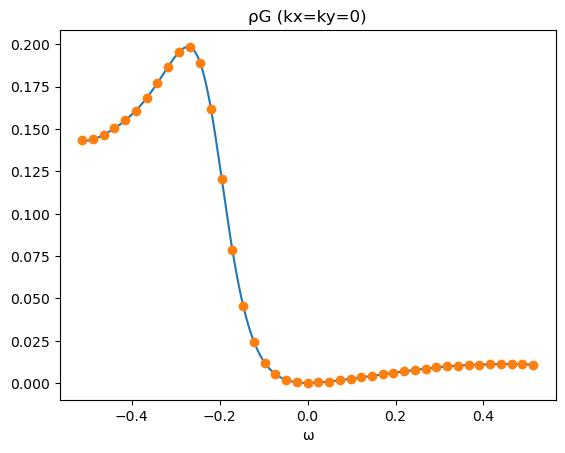

In [41]:
# spectral function data for the first (kx, ky) value (0, 0) in the n=0.710 data
# data is displayed with an interpolation

# first index in RHOG790LSCO is temperature, inside that is a list of 92x92 sequential 43 point spectral functions
# The first of these, at kx=0 and ky=0, is shown below
# To find the kx and ky value for a point in RHOG790LSCO you can check the same index in k1flat, k2flat

spl=interpolate.InterpolatedUnivariateSpline(omeganew[0],RHOG790LSCO[0][0:43])
omega=np.linspace(omeganew[0][0],omeganew[0][-1],500)
plt.plot(omega,spl(omega))
plt.plot(omeganew[0],RHOG790LSCO[0][0:43],'o')
plt.title("ρG (kx=ky=0)")
plt.xlabel("ω")
plt.show()

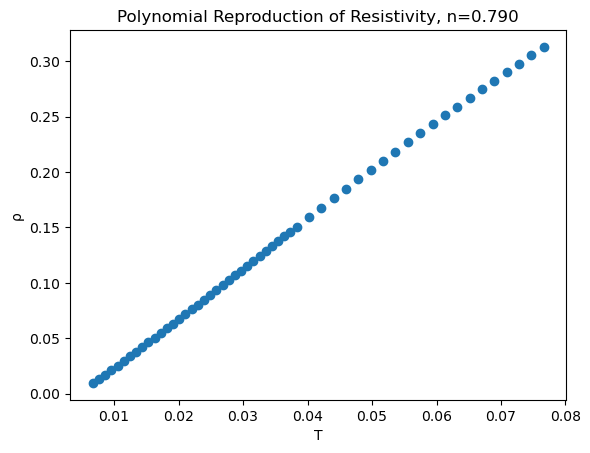

In [83]:
# one of the resistivity plots
# this is in dimensionless units, units we used can be found in the paper

plt.plot(temparray,rhoxx790LSCO,'o')
plt.title("Polynomial Reproduction of Resistivity, n=0.790")
plt.ylabel("ρ")
plt.xlabel("T")
plt.show()

INTERPOLATION

In [44]:
# an easy way to estimate resistivities at new densities from our results:

rhoarr=[rhoxx760LSCO,rhoxx790LSCO,rhoxx820LSCO,rhoxx850LSCO,rhoxx880LSCO]
rhoarr=[rho.tolist() for rho in rhoarr]
densities=[0.760,0.790,0.820,0.850,0.880];


tvals=np.tile(temparray,len(densities)).tolist()
tvals=tvals[2:]                # cut out two points since 0.760 didn't work at lowest two T
nvals=np.repeat(densities,len(temparray)).tolist()
nvals=nvals[2:]
rhovals=flatten(rhoarr)




X = np.linspace(min(tvals), max(tvals))
Y = np.linspace(min(nvals), max(nvals))
X, Y = np.meshgrid(X,Y)
interp = interpolate.LinearNDInterpolator(list(zip(tvals, nvals)), rhovals)
Z = interp(X, Y)

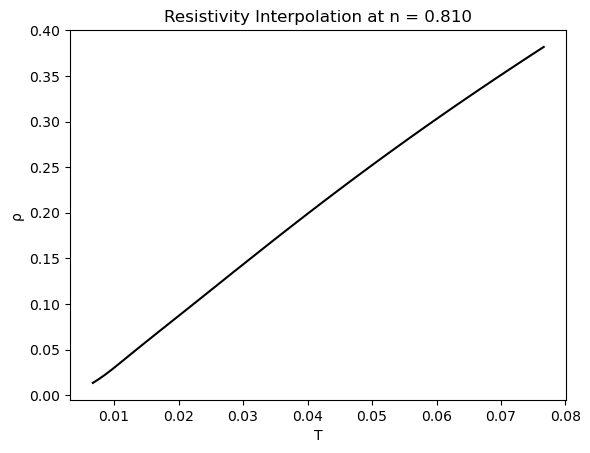

In [45]:
# demonstrating interpolation:

density=0.81

plt.plot(temparray,interp(temparray,density),'k-')
plt.title("Resistivity Interpolation at n = %1.3f" % density)
plt.ylabel("ρ")
plt.xlabel("T")
plt.show()